In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [5]:
df['Churn'] = df['Churn'].astype('int')

In [6]:
states = df.pop('State')

In [7]:
X, y =df.drop('Churn', axis = 1), df['Churn']

In [8]:
X.shape, y.shape

((3333, 18), (3333,))

Makin Hold-out sample

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_holdout, y_train, y_holdout = \
    train_test_split(X, y, test_size = .3, random_state = 17)

In [11]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

### Building a Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 17)

In [13]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

**Cross-validation in hand**

In [31]:
# SPECIAL OBJECT FOR CROSS-VALIDATION
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 17)

In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [41]:
from tqdm import tqdm_notebook

In [46]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []

max_depth_values = np.arange(2, 11)
# 4 each value of max depth

for current_max_depth in tqdm_notebook(max_depth_values):
    tree = DecisionTreeClassifier(random_state = 17, max_depth = current_max_depth)
    
#     perform cross-val
    CV_scores = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = skf)
    
    cv_accuracies_by_depth.append(CV_scores.mean())
    
#     assess the model w/ holdout
    tree.fit(X_train, y_train)
    
    curr_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, curr_ho_pred))

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/9 [00:00<?, ?it/s]

In [36]:
CV_scores = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = skf)

In [38]:
CV_scores.mean()

0.9318432879028775

In [43]:
accuracies_by_depth

[0.8769848636626811,
 0.9018352923877181,
 0.9211292975893981,
 0.9335600261003023,
 0.9361296192480539,
 0.936563398921065,
 0.9382746229701041,
 0.9318432879028775]

Text(0.5, 1.0, 'DT validation curves for max_depth')

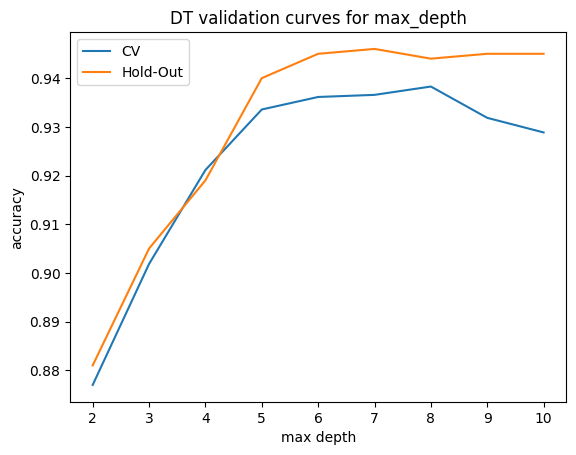

In [48]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label = 'CV')
plt.plot(max_depth_values, ho_accuracies_by_depth, label = 'Hold-Out')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DT validation curves for max_depth')

"fit-predict"

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
pred_holdout = tree.predict(X_holdout)

In [16]:
pred_holdout.shape, y_holdout.shape

((1000,), (1000,))

In [17]:
accuracy_score(y_holdout,pred_holdout)

0.921

In [18]:
import numpy as np

In [19]:
y.value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [20]:
# Tuning parameters
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [21]:
# StratifiedKFold?

In [23]:
params = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}

In [24]:
best_tree = GridSearchCV(estimator = tree, param_grid = params, cv = skf)

In [25]:
best_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [26]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [27]:
best_tree.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=17)

**Cross-Validation assessment of model quality**

In [28]:
best_tree.best_score_

0.9438485079633493

**Cross-Validation assessment of model quality**

In [29]:
pred_holdout_better = best_tree.predict(X_holdout)

In [30]:
accuracy_score(y_holdout,pred_holdout_better)

0.94

Visualizing the tree

In [50]:
from sklearn.tree import export_graphviz

In [51]:
export_graphviz(decision_tree = best_tree.best_estimator_,
               out_file = 'tree.dot', filled=True, feature_names = df.drop('Churn', axis = 1).columns)

In [54]:
!cat tree.dot

"cat" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
